In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as pyplot
import numpy
import tensorflow as tf

# Question 1

0.9871794871794872


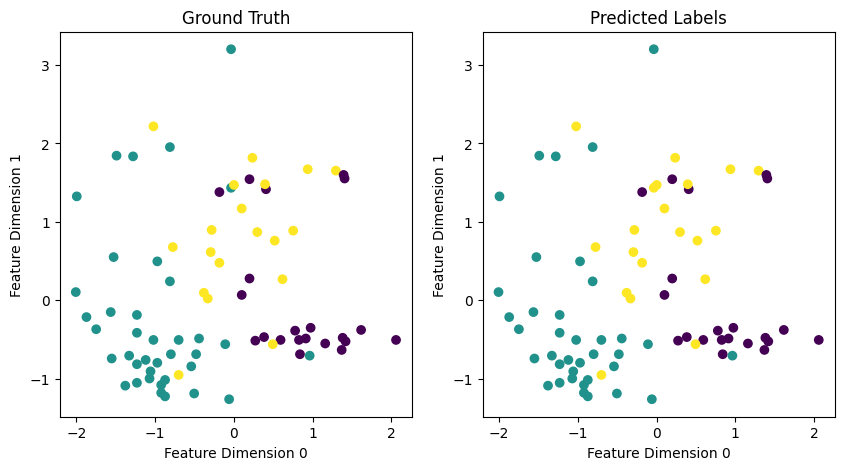

In [7]:
# Load the Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.56)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

# Standard Scaler
ss = StandardScaler().fit(train_data, train_labels)
train_fit = ss.transform(train_data)
test_fit = ss.transform(test_data)

# SVC
svc = SVC().fit(train_fit, train_labels)
svc_labels = svc.predict(test_fit)
print(svc.score(test_fit, test_labels))

#Scatter Graph
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_fit[:,0], test_fit[:,1], 
               c=test_labels)
pyplot.title("Ground Truth")
pyplot.xlabel("Feature Dimension 0")
pyplot.ylabel("Feature Dimension 1")
pyplot.subplot(122)
pyplot.scatter(test_fit[:,0], test_fit[:,1], 
               c=svc_labels)
pyplot.title("Predicted Labels")
pyplot.xlabel("Feature Dimension 0")
pyplot.ylabel("Feature Dimension 1")
pyplot.show()

0.9871794871794872


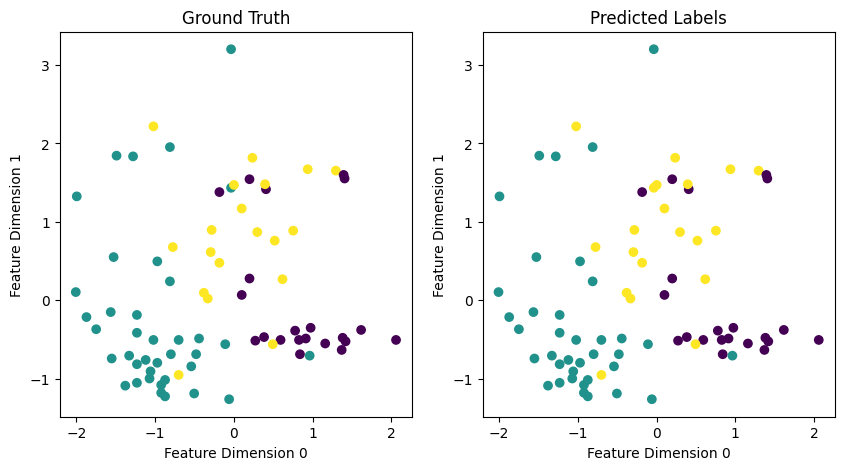

In [8]:
# Load the Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.56)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

# Standard Scaler
ss = StandardScaler().fit(train_data, train_labels)
train_fit = ss.transform(train_data)
test_fit = ss.transform(test_data)

# SVC
svc = SVC(kernel='rbf').fit(train_fit, train_labels)
svc_labels = svc.predict(test_fit)
print(svc.score(test_fit, test_labels))

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_fit[:,0], test_fit[:,1], 
               c=test_labels)
pyplot.title("Ground Truth")
pyplot.xlabel("Feature Dimension 0")
pyplot.ylabel("Feature Dimension 1")
pyplot.subplot(122)
pyplot.scatter(test_fit[:,0], test_fit[:,1], 
               c=svc_labels)
pyplot.title("Predicted Labels")
pyplot.xlabel("Feature Dimension 0")
pyplot.ylabel("Feature Dimension 1")
pyplot.show()

# Question 2

Epoch 1/200
3/3 [==============================] - 1s 144ms/step - loss: 1.2177 - sparse_categorical_accuracy: 0.4500 - accuracy: 0.4500 - val_loss: 1.2670 - val_sparse_categorical_accuracy: 0.3000 - val_accuracy: 0.3000
Epoch 2/200
3/3 [==============================] - 0s 28ms/step - loss: 1.1992 - sparse_categorical_accuracy: 0.4625 - accuracy: 0.4625 - val_loss: 1.2489 - val_sparse_categorical_accuracy: 0.3000 - val_accuracy: 0.3000
Epoch 3/200
3/3 [==============================] - 0s 28ms/step - loss: 1.1821 - sparse_categorical_accuracy: 0.4875 - accuracy: 0.4875 - val_loss: 1.2308 - val_sparse_categorical_accuracy: 0.3000 - val_accuracy: 0.3000
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 1.1647 - sparse_categorical_accuracy: 0.4875 - accuracy: 0.4875 - val_loss: 1.2119 - val_sparse_categorical_accuracy: 0.3500 - val_accuracy: 0.3500
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 1.1464 - sparse_categorical_accuracy: 0.4875 - 

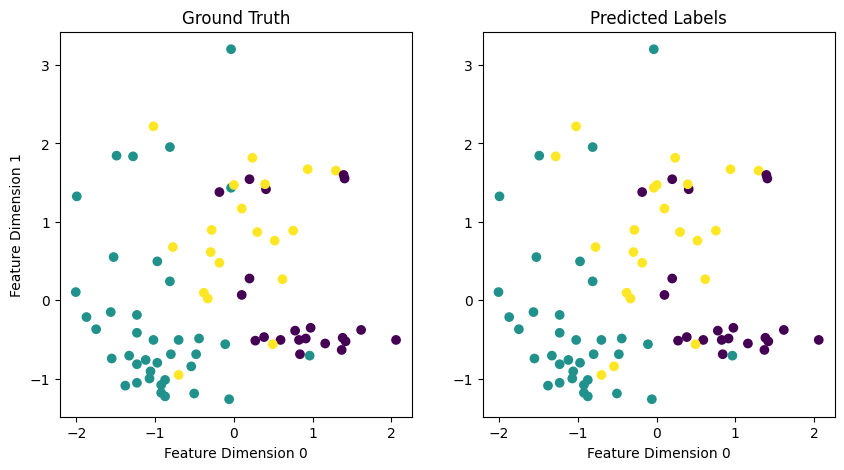

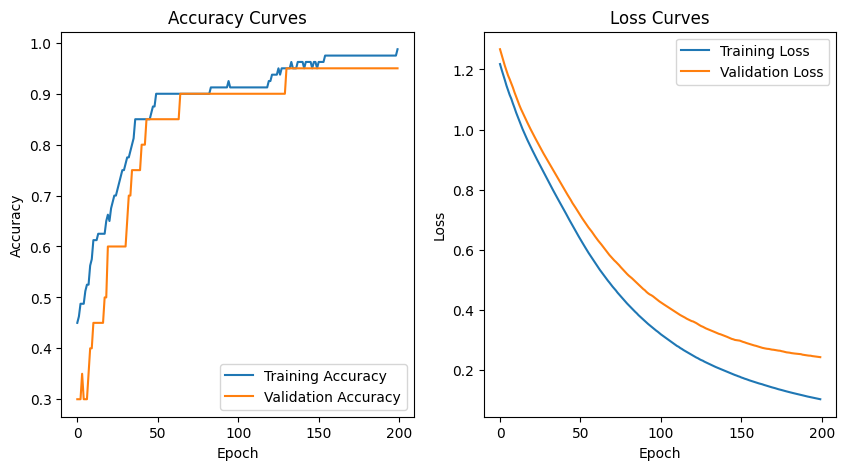

In [2]:
# Load the Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.56)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

# Standard Scaler
ss = StandardScaler()
train_data = ss.fit_transform(train_data)
test_data = ss.transform(test_data)

# Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.SGD(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, epochs=200, validation_split=0.2, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,0], test_data[:,1], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,0], test_data[:,1], c=numpy.argmax(predict, axis=1))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')

pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()

Epoch 1/200
3/3 [==============================] - 1s 136ms/step - loss: 1.0664 - sparse_categorical_accuracy: 0.4625 - accuracy: 0.4625 - val_loss: 1.0282 - val_sparse_categorical_accuracy: 0.5500 - val_accuracy: 0.5500
Epoch 2/200
3/3 [==============================] - 0s 32ms/step - loss: 1.0454 - sparse_categorical_accuracy: 0.5625 - accuracy: 0.5625 - val_loss: 1.0081 - val_sparse_categorical_accuracy: 0.6000 - val_accuracy: 0.6000
Epoch 3/200
3/3 [==============================] - 0s 28ms/step - loss: 1.0263 - sparse_categorical_accuracy: 0.5875 - accuracy: 0.5875 - val_loss: 0.9882 - val_sparse_categorical_accuracy: 0.6000 - val_accuracy: 0.6000
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 1.0072 - sparse_categorical_accuracy: 0.6125 - accuracy: 0.6125 - val_loss: 0.9686 - val_sparse_categorical_accuracy: 0.6000 - val_accuracy: 0.6000
Epoch 5/200
3/3 [==============================] - 0s 28ms/step - loss: 0.9887 - sparse_categorical_accuracy: 0.6125 - 

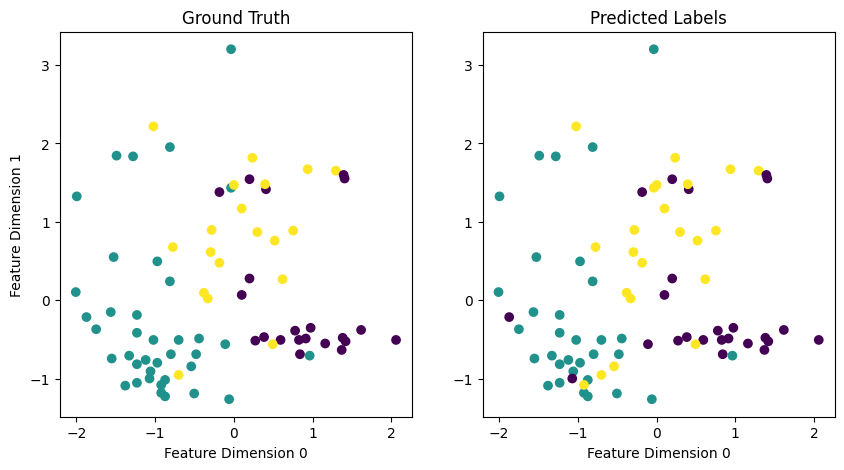

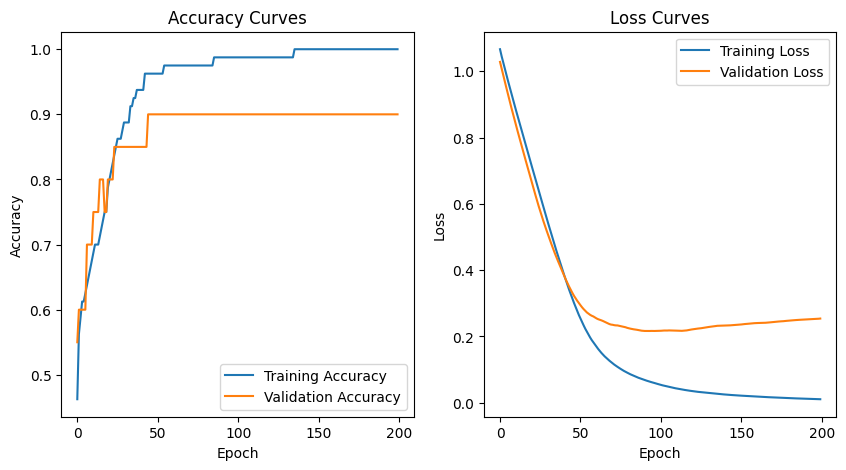

In [3]:
# Load the Data
data = numpy.load('wineData.npy')
split = math.ceil(len(data) * 0.56)
train_data = data[:split]
test_data = data[split:]
labels = numpy.load('wineLabels.npy')
train_labels = labels[:split]
test_labels = labels[split:]

# Standard Scaler
ss = StandardScaler()
train_data = ss.fit_transform(train_data)
test_data = ss.transform(test_data)

# Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, epochs=200, validation_split=0.2, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,0], test_data[:,1], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,0], test_data[:,1], c=numpy.argmax(predict, axis=1))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')

pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()

# Question 3

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.7903 - sparse_categorical_accuracy: 0.3974 - accuracy: 0.3974 - val_loss: 1.2637 - val_sparse_categorical_accuracy: 0.6547 - val_accuracy: 0.6547
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9996 - sparse_categorical_accuracy: 0.7157 - accuracy: 0.7157 - val_loss: 0.7868 - val_sparse_categorical_accuracy: 0.7896 - val_accuracy: 0.7896
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7252 - sparse_categorical_accuracy: 0.7993 - accuracy: 0.7993 - val_loss: 0.6359 - val_sparse_categorical_accuracy: 0.8271 - val_accuracy: 0.8271
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6184 - sparse_categorical_accuracy: 0.8298 - accuracy: 0.8298 - val_loss: 0.5736 - val_sparse_categorical_accuracy: 0.8443 - val_acc

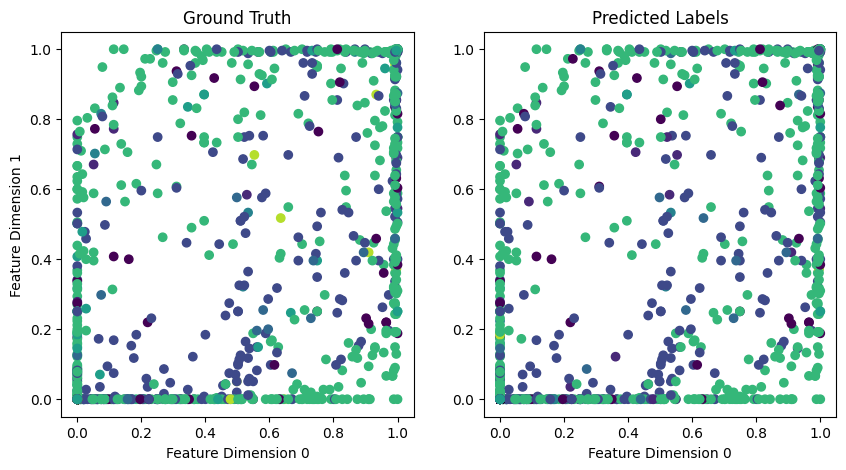

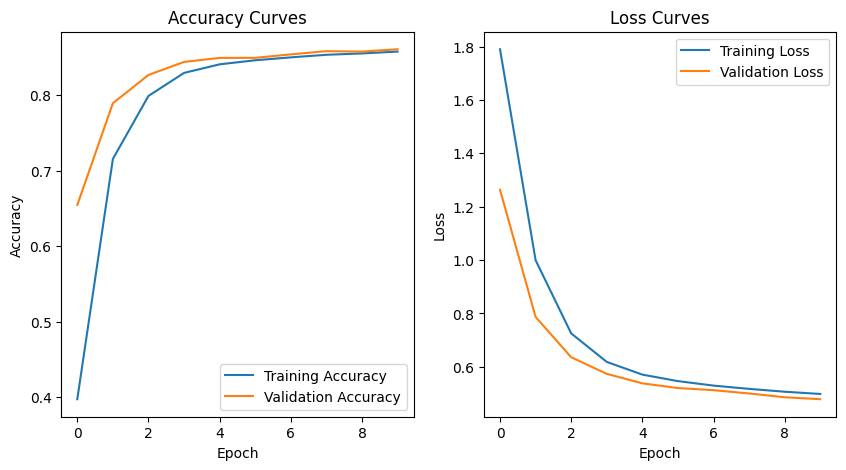

In [4]:
# Load
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(f'MNIST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(numpy.unique(train_labels))}')

# Flatten
train_data = numpy.reshape(train_data, (60000, 784))
test_data = numpy.reshape(test_data, (10000, 784))

# Normalise
train_data = train_data / 255
test_data = test_data / 255

# Neural Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, validation_split=0.2, epochs=10, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,100], test_data[:,101], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,100], test_data[:,101], c=numpy.argmax(predict, axis=1))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')
pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4510 - sparse_categorical_accuracy: 0.8679 - accuracy: 0.8679 - val_loss: 0.2715 - val_sparse_categorical_accuracy: 0.9208 - val_accuracy: 0.9208
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2479 - sparse_categorical_accuracy: 0.9294 - accuracy: 0.9294 - val_loss: 0.2097 - val_sparse_categorical_accuracy: 0.9399 - val_accuracy: 0.9399
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2044 - sparse_categorical_accuracy: 0.9402 - accuracy: 0.9402 - val_loss: 0.1839 - val_sparse_categorical_accuracy: 0.9466 - val_accuracy: 0.9466
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9484 - accuracy: 0.9484 - val_loss: 0.1743 - val_sparse_categorical_accuracy: 0.9482 - val_acc

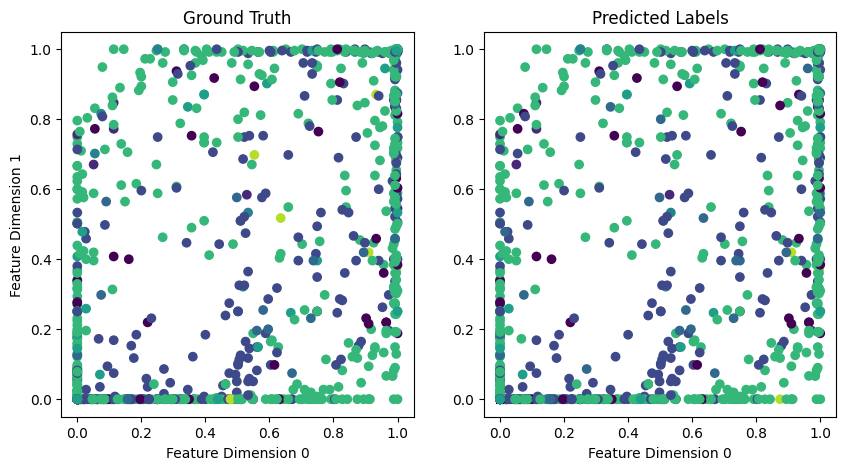

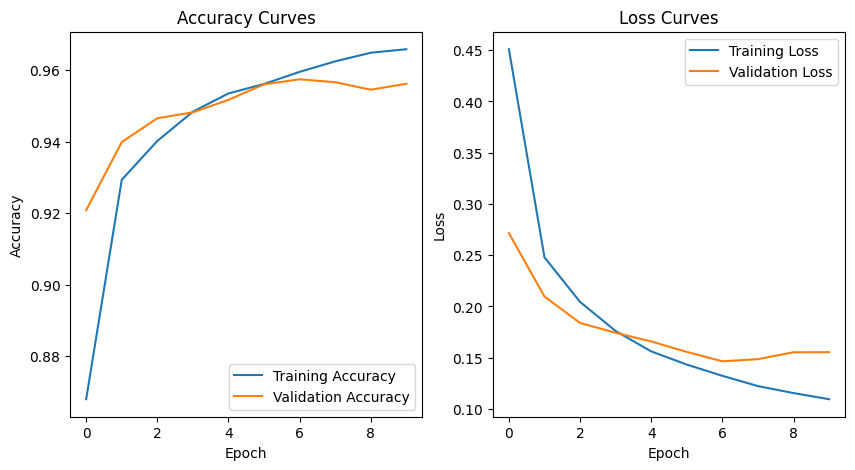

In [5]:
# Load
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(f'MNIST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(numpy.unique(train_labels))}')

# Flatten
train_data = numpy.reshape(train_data, (60000, 784))
test_data = numpy.reshape(test_data, (10000, 784))

# Normalise
train_data = train_data / 255
test_data = test_data / 255

# Neural Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(40, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, validation_split=0.2, epochs=10, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,100], test_data[:,101], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,100], test_data[:,101], c=numpy.argmax(predict, axis=1))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')
pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()

# Question 4

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 2.2840 - sparse_categorical_accuracy: 0.1021 - accuracy: 0.1021 - val_loss: 2.2632 - val_sparse_categorical_accuracy: 0.1015 - val_accuracy: 0.1015
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 2.2358 - sparse_categorical_accuracy: 0.1040 - accuracy: 0.1040 - val_loss: 2.2064 - val_sparse_categorical_accuracy: 0.1026 - val_accuracy: 0.1026
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 2.1714 - sparse_categorical_accuracy: 0.1064 - accuracy: 0.1064 - val_loss: 2.1344 - val_sparse_categorical_accuracy: 0.1044 - val_accuracy: 0.1044
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 2.0986 - sparse_categorical_accuracy: 0.1082 - accuracy: 0.1082 - val_loss: 2.0597 - val_sparse_categorical_accuracy: 0.1067 - val

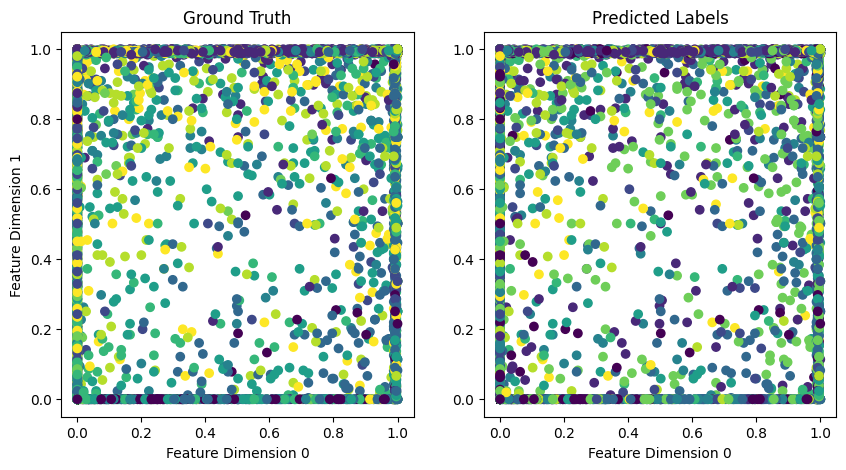

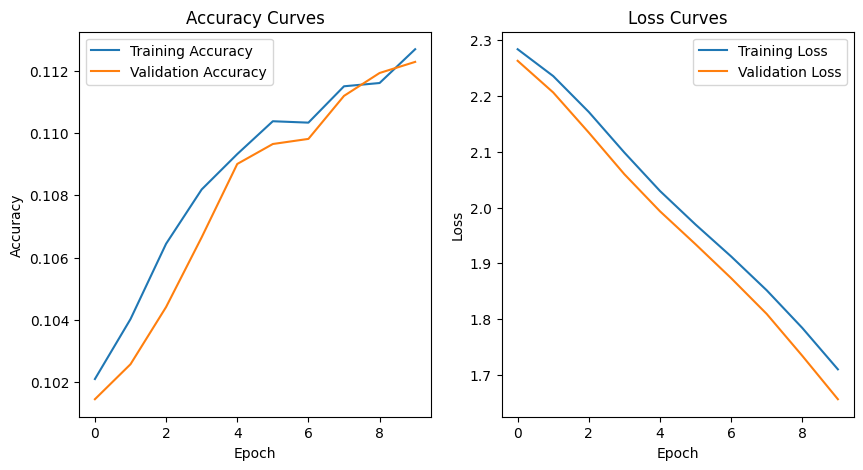

In [6]:
# Load
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(f'MNIST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(numpy.unique(train_labels))}')

# Flatten
train_data = numpy.expand_dims(train_data, axis=3)
test_data = numpy.expand_dims(test_data, axis=3)

# Normalise
train_data = train_data / 255
test_data = test_data / 255

# Neural Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(8, 8, activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D(pool_size=(20, 20)),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, validation_split=0.2, epochs=10, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,13,13], test_data[:,14,14], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,13,13], test_data[:,14,14], c=numpy.argmax(predict, axis=3))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')
pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10
Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.9916 - sparse_categorical_accuracy: 0.1102 - accuracy: 0.1102 - val_loss: 1.6792 - val_sparse_categorical_accuracy: 0.1114 - val_accuracy: 0.1114
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.5023 - sparse_categorical_accuracy: 0.1147 - accuracy: 0.1147 - val_loss: 1.3349 - val_sparse_categorical_accuracy: 0.1145 - val_accuracy: 0.1145
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2608 - sparse_categorical_accuracy: 0.1168 - accuracy: 0.1168 - val_loss: 1.1518 - val_sparse_categorical_accuracy: 0.1156 - val_accuracy: 0.1156
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.1198 - sparse_categorical_accuracy: 0.1182 - accuracy: 0.1182 - val_loss: 1.0327 - val_sparse_categorical_accuracy: 0.1163 - val_ac

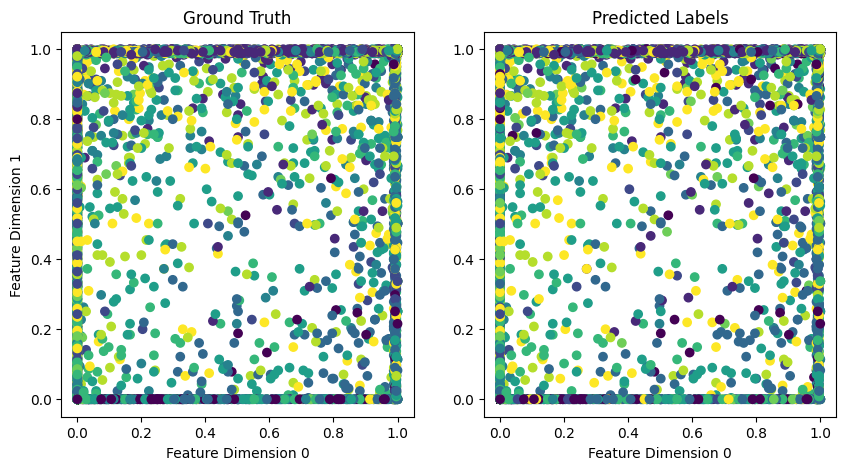

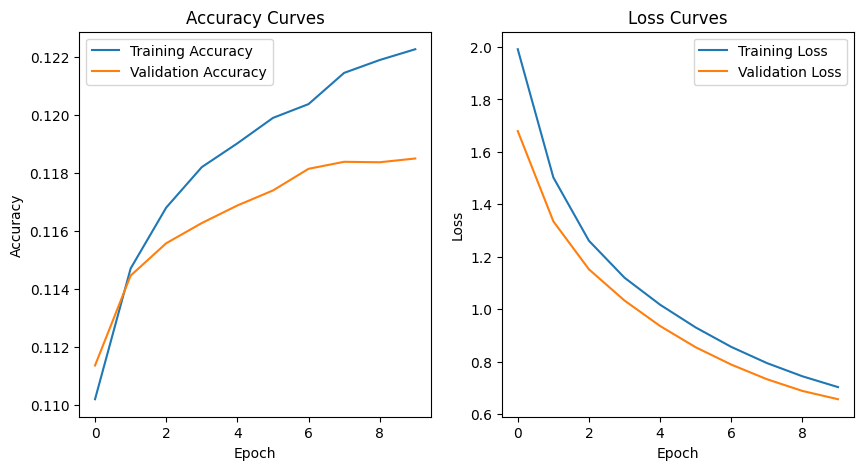

In [7]:
# Load
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(f'MNIST sample shape: {train_data.shape[1:]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(numpy.unique(train_labels))}')

# Flatten
train_data = numpy.expand_dims(train_data, axis=3)
test_data = numpy.expand_dims(test_data, axis=3)

# Normalise
train_data = train_data / 255
test_data = test_data / 255

# Neural Network
network = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(8, 8, activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D(pool_size=(20, 20)),
    tf.keras.layers.Dense(len(numpy.unique(train_labels)), activation=tf.nn.softmax)])
network.compile(optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), 'accuracy'])
history = network.fit(train_data, train_labels, validation_split=0.2, epochs=10, verbose=1)
predict = network.predict(test_data)
network.evaluate(x=test_data, y=test_labels)

# Scatter Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.scatter(test_data[:,13,13], test_data[:,14,14], c=test_labels)
pyplot.ylabel('Feature Dimension 1')
pyplot.xlabel('Feature Dimension 0')
pyplot.title('Ground Truth')
pyplot.subplot(122)
pyplot.title('Predicted Labels')
pyplot.xlabel('Feature Dimension 0')
pyplot.scatter(test_data[:,13,13], test_data[:,14,14], c=numpy.argmax(predict, axis=3))
pyplot.show()

# Line Graphs
pyplot.figure(figsize=[10,5])
pyplot.subplot(121)
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training Accuracy',
           'Validation Accuracy'])
pyplot.title('Accuracy Curves')
pyplot.subplot(122)
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training Loss',
           'Validation Loss'])
pyplot.title('Loss Curves')
pyplot.show()